In [1]:
import glob
from matplotlib import pyplot as plt
import numpy as np

## Validation of efficiencies for direct stau production

#### CMS Values (Table 2 from CMS-EXO-13-006, fast technique)

In [2]:
# {stau_mass : acceptance}
effsCMS = {126: 0.24, 156. : 0.29, 200. : 0.35, 247: 0.40, 308 : 0.47,
          370 : 0.53, 494 : 0.62, 745 : 0.67, 1029 : 0.59}

#### Recasting values

In [3]:
effsRecast = {}
for f in glob.glob('*.slha'):
    #Extract stau mass from slha file:
    with open(f,'r') as slhaData:
            stauMass = eval([m.split()[1] for m in slhaData.read().split('BLOCK MASS')[1].split('BLOCK')[0].split('\n')
                        if '1000015' in m][0])
    #Extract efficiency from lhe file:
    with open(f.replace('.slha','.lhe'),'r') as lheData:
        effs = [eval(x.split('+-')[0]) for x in 
                lheData.read().split('<total>')[1].split('</total>')[0].split('Total Efficiency:')[1:]]
        eff = max(effs) #use maximum non-zero efficiency

    effsRecast[stauMass] = eff

#### Compare values

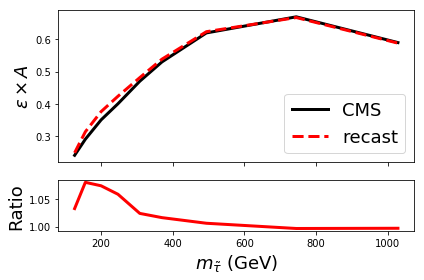

In [9]:
#Compute ratios
ratio = np.array([[mass,effsRecast[mass]/effsCMS[mass]] for mass in effsCMS])

#Define subplots and their properties:
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]})
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#Plot curves
CMSpoints = np.array(sorted(list(effsCMS.items())))
Recastpoints = np.array(sorted(list(effsRecast.items())))
axarr[0].plot(CMSpoints[:,0],CMSpoints[:,1],'-',color='black',linewidth=3.0,label='CMS')
axarr[0].plot(Recastpoints[:,0],Recastpoints[:,1],'--',color='red',linewidth=3.0,label='recast')
axarr[0].set_ylabel(r'$\epsilon \times A$', fontsize=18)

#Plot ratio
axarr[1].plot(ratio[:,0],ratio[:,1],color='red',linewidth=3.0)
axarr[1].set_ylabel('Ratio', fontsize=18) #Y-label
axarr[1].set_xlabel(r'$m_{\tilde{\tau}}$ (GeV)', fontsize=18)
axarr[0].legend(fontsize=18)
f.tight_layout()
plt.show()

In [10]:
f.savefig('validationPlot.png')